03 - Limpieza del dataset + Resultados con regresion logistica

In [55]:
from os import O_TRUNC
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as seabornInstance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
from IPython.display import Image

import prediccion

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from statistics import mean

df = pd.DataFrame(pd.read_csv('mobile_price.csv'))
dfa = df.copy()



En la primera parte habiamos dejado algunos conflictos o anomalias sin resolver. Se habia dicho que se iban a volver a ellos luego de realizar la primera prediccion.<br><br>
Como ya sabemos el algoritmo de regresion logistica nos arrojo muy buenos resultados , la pregunta es ¿ podemos mejorarlos realizando alguna limpieza sobre datos que nos resultan anormales o invalidos? <br> <br> A continuacion se haran un total de 5 pruebas ,la idea es que cada prueba sea una continuacion de la realizada anteriormente siempre y cuando cada prueba que realicemos vayamos mejorando el rendimiento del algoritmo.

# Prueba 1  : PX HEIGHT IGUAL A CERO <br>
Lo que se muestran abajo son los celulares con un px_height = 0. Recordemos que este valor no puede ser jamas 0 en un celular. Ademas solo contamos con 2 casos en todo el dataset lo cual representa un 0.1% de todos los celulares que tenemos cargados actualmente . ¿ Eliminar estos 2 registros supondra alguna mejora en nuestras predicciones? 

In [56]:
celular_px_height_cero = dfa.loc[df['px_height']==0]
celular_px_height_cero

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1481,1834,0,2.100000000000000,0,7,1,40,0.100000000000000,99,4,...,0,1987,3692,13,0,16,1,1,0,3
1933,897,1,2.000000000000000,0,3,1,2,0.600000000000000,154,8,...,0,994,1958,7,5,7,1,1,0,1


Ahora eliminamos todos los registros que tengan un px_height igual a cero

In [57]:

dfa = dfa.drop(celular_px_height_cero.index) 
celular_px_height_cero = dfa.loc[df['px_height']==0]
celular_px_height_cero

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range


Finalmente ya no contamos con celulares con un altura de pixeles igual 0 . Veamos si logramos mejorar el rendimiento de nuestro algoritmo ya que ahora tenemos un dataset con menos errores supuestamente

In [58]:
algoPrediccion = prediccion.ClasificacionModelo(dfa)
algoPrediccion.realizarEntrenamientoCompleto('price_range')



shape X_train (1598, 17)
shape X_test (400, 17)
shape y_train (1598, 1)
shape y_test (400, 1)


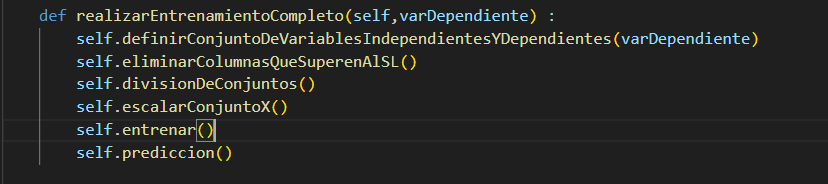

In [59]:
Image('./imagenes/20.png')

El metodo realizarEntrenamientoCompleto() lo que hace es ejecutar todas las operaciones necesarias para realizar una prediccion y finalmente poder obtener un resultado. Como vemos primero define el conjunto de variables independientes , luego realiza la eliminacion hacia atras para luego eliminar aquellas variables que se consideren las menos significativas en nuestra prediccion para continuar con la division de conjutos y asi luego escalar todos los datos para que no haya ninguna variable independiente que domine sobre otros para finalmente realizar el entrenamiento con el algoritmo especificado (en este caso por defecto el de logistica) y asi realizar las predicciones y obtener los resultados del y_pred o mejor dicho los rango de precio de celulares predichos que estabamos buscando <br> A continuacion procedemos a observa la matriz de confusion

[[101   3   0   0]
 [  3  85   0   0]
 [  0   3  99   6]
 [  0   0   1  99]]


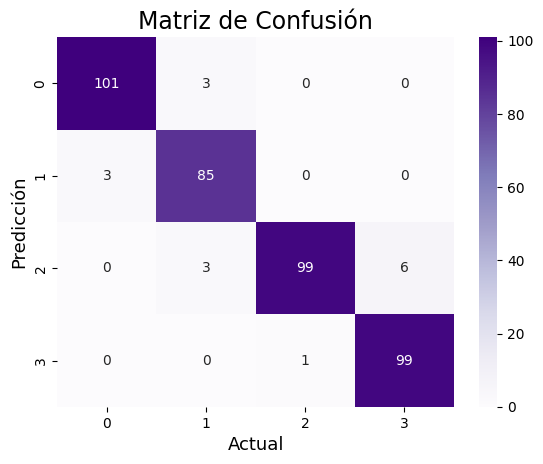

In [60]:
algoPrediccion.graficoMatrizDeConfusion()

En nuestro analisis previo haciendo la eliminacion hacia atras habiamos disminuido reduciendo la cantidad de acierto desdee 382 a 380. Ahora logramos pasar de 380 a 384 (con la eliminacion hacia atras incluida!!) . Con lo cual logramos mejorar el rendimiento de nuestro algoritmo en un 1% aproximadamente. Algo muy bueno teniendo en cuenta que ya solo contabamos con un margen de mejora de un 4.5% aproximado pues habiamos obtenido un rendimiento de un 95,5%. Podemos concluir que efectivamente esos celulares con px_height igual a 0 contenian informacion erronea y al eliminarlos hemos obtenido una mejora en los resultados de las prediccione lo cual sugiere que esos datos erróneos estaban afectando negativamente el rendimiento de tu modelo.


In [61]:
algoPrediccion.metricas()

              precision    recall  f1-score   support

           0     0.9712    0.9712    0.9712       104
           1     0.9341    0.9659    0.9497        88
           2     0.9900    0.9167    0.9519       108
           3     0.9429    0.9900    0.9659       100

    accuracy                         0.9600       400
   macro avg     0.9595    0.9609    0.9597       400
weighted avg     0.9610    0.9600    0.9599       400



El accuracy anterior obtenido era de 0.95. Ahora obtuvimos una mejora de 1% pasando a 0.96

<hr>

# Prueba 2  : sc_w  IGUAL A CERO

Al igual que el caso anterior sc_w que representaba el ancho de pantalla del móvil en centímetros , jamas puede ser igual a 0. Como podemos ver abajo contamos con 179 casos. La primera solucion en mente es remplazar el 0 por el promedio de esa columna

In [62]:
dfb = dfa.copy()

celular_sc_w_cero = dfa.loc[dfa['sc_w']==0]
celular_sc_w_cero

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
12,1815,0,2.800000000000000,0,2,0,33,0.600000000000000,159,4,...,607,748,1482,18,0,2,1,0,0,1
24,503,0,1.200000000000000,1,5,1,8,0.400000000000000,111,3,...,201,1245,2583,11,0,12,1,0,0,1
33,1310,1,2.200000000000000,1,0,1,51,0.600000000000000,100,4,...,178,1919,3845,7,0,12,1,1,0,3
42,1253,1,0.500000000000000,1,5,1,5,0.200000000000000,152,2,...,685,714,1878,15,0,4,1,1,0,1
50,1547,1,3.000000000000000,1,2,1,14,0.700000000000000,198,3,...,1042,1832,2059,5,0,15,1,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1918,772,0,1.000000000000000,1,0,1,23,0.600000000000000,97,7,...,317,1805,2782,7,0,17,1,0,0,2
1920,591,1,0.500000000000000,1,1,1,16,0.900000000000000,90,6,...,892,1603,3746,5,0,5,1,1,0,3
1946,590,1,1.200000000000000,1,0,0,32,0.400000000000000,141,6,...,227,509,1817,10,0,6,0,1,0,0
1954,686,1,2.700000000000000,1,0,0,36,0.100000000000000,194,4,...,64,745,1503,10,0,13,0,0,0,0


Remplazamos todos los ceros por el promedio de la columna o variable independiente sc_w

In [63]:


promedioColumnaSc_w = dfa['sc_w'].mean()
dfa['sc_w'] = dfa['sc_w'].replace(0, promedioColumnaSc_w)

celular_sc_w_cero = dfa.loc[dfa['sc_w']==0]
celular_sc_w_cero


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range


Ahora comprobemos si mejoramos los resultados de nuestra predicciones. Recordemos que seguimos teniendo en cuenta las mejoras hechas en la prueba numero uno

In [64]:
algoPrediccion2 = prediccion.ClasificacionModelo(dfa)
algoPrediccion2.realizarEntrenamientoCompleto('price_range')

shape X_train (1598, 17)
shape X_test (400, 17)
shape y_train (1598, 1)
shape y_test (400, 1)


In [65]:
algoPrediccion2.metricas()

              precision    recall  f1-score   support

           0     0.9712    0.9712    0.9712       104
           1     0.9341    0.9659    0.9497        88
           2     0.9900    0.9167    0.9519       108
           3     0.9429    0.9900    0.9659       100

    accuracy                         0.9600       400
   macro avg     0.9595    0.9609    0.9597       400
weighted avg     0.9610    0.9600    0.9599       400



Obtuvimos exactamente el mismo rendimiento. Sin variaciones en ninguna de las metricas. Lo que indica que cambiar ceros por el promedio no hace que algoritmo aprenda de una mejor manera.

[[101   3   0   0]
 [  3  85   0   0]
 [  0   3  99   6]
 [  0   0   1  99]]


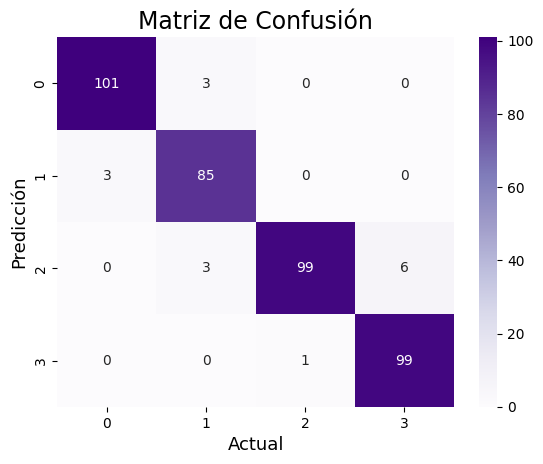

In [66]:
algoPrediccion.graficoMatrizDeConfusion()

Nada mas que decir .La otra alternativa propuesta es eliminar estas filas que consideramos que contienen datos erroneos. Otra alternativa seria obtener esos sc_w realizando predicciones pero esa solucion requiere mas tiempo asi que vamos por la opcion de eliminar esas filas erroneas.

<hr>

# Pruebas 3 : Eliminacion de registros con celulares en donde su sc_w es igual a cero

In [67]:
dfb = dfb[dfb['sc_w'] != 0]

algoPrediccion2 = prediccion.ClasificacionModelo(dfb)
algoPrediccion2.realizarEntrenamientoCompleto('price_range')
algoPrediccion2.metricas()


shape X_train (1455, 17)
shape X_test (364, 17)
shape y_train (1455, 1)
shape y_test (364, 1)
              precision    recall  f1-score   support

           0     0.9551    1.0000    0.9770        85
           1     0.9505    0.9320    0.9412       103
           2     0.9419    0.9419    0.9419        86
           3     1.0000    0.9778    0.9888        90

    accuracy                         0.9615       364
   macro avg     0.9619    0.9629    0.9622       364
weighted avg     0.9618    0.9615    0.9615       364



obtuvimos una ligera mejora de 0.015 %. Toda mejora es bienvenida , aunque se es conciente de que el costo es eliminar 179 filas aunque son filas con datos absurdos como el sc_w igual a 0. Como aun contamos con muchisimas filas por suerte para realizar las predicciones es un costo que estamos dispuesto a aceptar. Si tuvieramos por ejemplo 300 celulares en un dataset y tenemos que eliminar 179 creo que no seria una muy buena idea eliminar todos esos registros ya que perderiamos demasiados datos en proporcion. Recordar que imputamos los datos con el promedio y no ubtuvimos mejora alguna.

<hr>

# Pruebas 4 : Celulares sin camara primaria ni secundaria

In [68]:
dfc = dfb.copy()
celulares_sin_camara=dfc.loc[(dfc['pc']==0) & (dfc['fc']==0) ]
celulares_sin_camara

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
7,1954,0,0.500000000000000,1,0,0,24,0.800000000000000,187,4,...,512,1149,700,16,3,5,1,1,1,0
52,1654,1,1.500000000000000,1,0,1,43,0.300000000000000,109,2,...,546,629,3112,12,5,10,1,1,0,3
67,1866,0,1.400000000000000,0,0,0,30,0.500000000000000,182,3,...,108,1781,3834,16,11,8,0,0,0,3
92,885,0,2.300000000000000,1,0,1,15,0.400000000000000,103,7,...,769,802,1410,16,10,5,1,1,1,0
116,909,1,1.400000000000000,0,0,0,53,0.300000000000000,82,8,...,635,973,3187,12,9,4,1,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1906,1807,0,0.800000000000000,1,0,1,38,0.200000000000000,97,8,...,1332,1814,1069,7,6,7,1,0,0,1
1911,1259,0,1.200000000000000,1,0,0,13,0.500000000000000,97,2,...,1210,1989,340,17,13,4,1,0,1,0
1931,1854,0,0.900000000000000,1,0,1,33,0.400000000000000,195,1,...,665,718,1675,14,12,9,1,0,1,1
1968,1667,0,1.000000000000000,1,0,1,21,0.900000000000000,138,2,...,1211,1396,635,17,7,15,1,0,0,0


Contamos con 88 celulares sin camaras principal. Como ya hicimos varias eliminaciones es logico que tengamos menos celulares sin camara principal (originalmente teniamos 101)

recordemos 
- price_range: Esta es la variable objetivo con valores 0 (costo bajo), 1 (costo medio), 2 (costo alto) y 3 (costo muy alto).

Por lo general los celulares de costo medio hacia arriba deberian tener camara principal mientras que se podria que aquellos de costo mas bajo (rango de precio igual a 0) no los tenga. Bajo este criterio vamos a eliminar todos los celulares que no sean de costo bajo que no cuenten con una camara principal . Recordemos que se considera que si 'pc' es igual a cero entonces el celular no cuenta con una camara principal ,de lo contrario cualquier valor mayor a cero entonces representa los pixeles de la camara del celular que por supuesto posee

A continuacion obtengamos aquellos celulares que no sean de costo bajo y que a su vez no tienen camara principal y camara secundaria. (Recodemos que si un celular no tiene camara principal tampoco tiene una secundaria)

In [69]:
celularesSinCamaraNoCostoBajos=dfc.loc[(dfc['pc']==0) & (dfc['fc']==0) &  (dfc['price_range']!=0)  ]
celularesSinCamaraNoCostoBajos.head(20)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
52,1654,1,1.500000000000000,1,0,1,43,0.300000000000000,109,2,...,546,629,3112,12,5,10,1,1,0,3
67,1866,0,1.400000000000000,0,0,0,30,0.500000000000000,182,3,...,108,1781,3834,16,11,8,0,0,0,3
116,909,1,1.400000000000000,0,0,0,53,0.300000000000000,82,8,...,635,973,3187,12,9,4,1,0,0,2
135,1213,1,0.500000000000000,0,0,0,16,0.500000000000000,108,5,...,226,1248,2700,12,3,9,0,0,1,2
211,1539,1,2.600000000000000,0,0,0,41,0.100000000000000,159,8,...,1112,1666,2107,15,9,10,1,0,1,2
241,724,0,2.700000000000000,1,0,0,44,0.500000000000000,187,7,...,1273,1754,2311,7,6,7,1,0,0,2
251,1210,0,0.500000000000000,0,0,0,63,0.100000000000000,93,5,...,1177,1462,2394,17,9,7,0,0,0,2
287,1563,0,2.400000000000000,0,0,1,24,0.200000000000000,170,8,...,142,1699,3660,7,5,5,1,1,0,3
314,1163,0,2.800000000000000,1,0,0,49,0.600000000000000,155,2,...,520,754,2768,19,2,12,0,0,1,2
413,1178,1,1.300000000000000,0,0,0,49,0.600000000000000,101,5,...,579,596,2511,6,3,17,0,0,0,2


Contamo con 20 casosLo que vamos hacer es eliminar todos aquellos celulares que no sean de costo bajo y que tengan 0 pixeles en sus camaras principales

In [70]:

condicionDeBorrado = (dfc['pc'] == 0) & (dfc['fc'] == 0) & (dfc['price_range'] != 0)
dfc = dfc.drop(dfc[condicionDeBorrado].index)

Ahora realizamos las pruebas luego de realizar la eliminacion

In [71]:
algoPrediccion2 = prediccion.ClasificacionModelo(dfc)
algoPrediccion2.realizarEntrenamientoCompleto('price_range')
algoPrediccion2.metricas()

shape X_train (1408, 17)
shape X_test (353, 17)
shape y_train (1408, 1)
shape y_test (353, 1)
              precision    recall  f1-score   support

           0     0.9796    0.9897    0.9846        97
           1     0.9588    0.9588    0.9588        97
           2     0.9747    0.9506    0.9625        81
           3     0.9873    1.0000    0.9936        78

    accuracy                         0.9745       353
   macro avg     0.9751    0.9748    0.9749       353
weighted avg     0.9745    0.9745    0.9744       353



Volvimos a mejorar los resultados de predicciones esta vez  em mas de 1% obteniendo un resultado de 0.9745 !! Efectivamente estamos obtenieniendo mejores resultado realizando esta limpieza de datos. Lo unico malo es que estamos perdiendo filas que si bien contiene datos erroneo aportaban informacion . Que un celular tenga informacion invalida en alguna de sus columna no hace que automaticamente el reste de las columnas que posee tambien lo sean

<hr>

# Prueba 5 : Variable confusoras

Hasta ahora hemos eliminado filas que hemos considerado que tenian en algunas de sus columnas datos erroneos. Tambien antes habiamos eliminado 3 columnas utilizando la eliminacion hacia atras (porque superaban al sl>0.05) . Ahora volvamos al tema de las variables confusoras

Veamos como era el dataset antes de la eliminacion hacia atras

<Axes: >

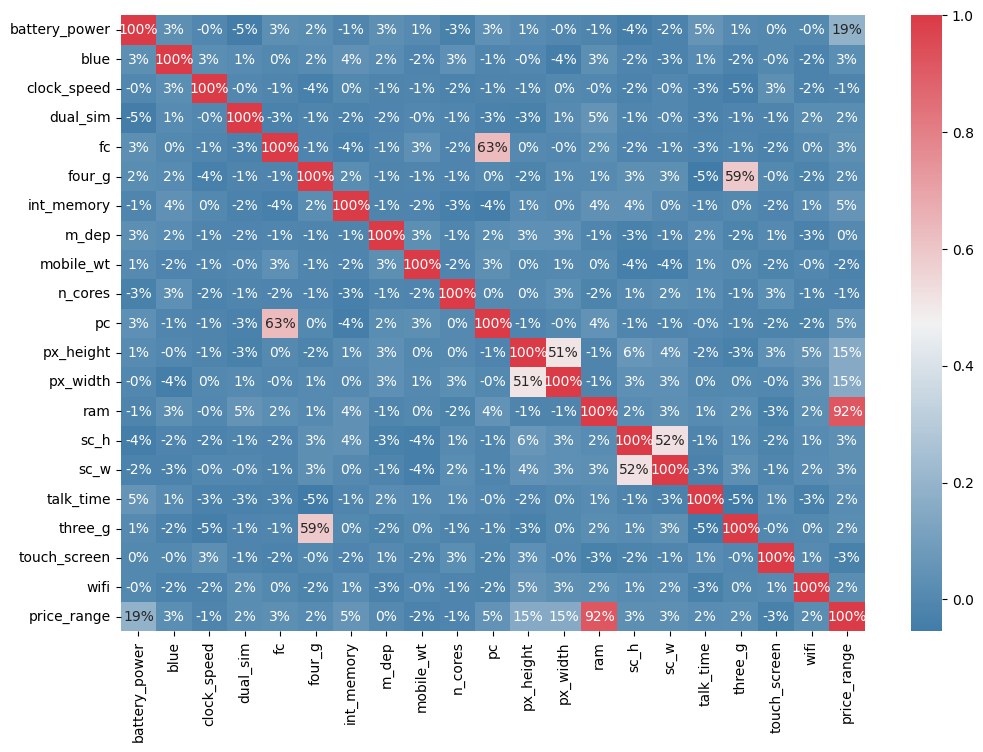

In [72]:
dfcd = dfc.copy()
corr = dfcd.corr()
plt.subplots(figsize=(12,8))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, fmt='.0%',
            cmap=sns.diverging_palette(240, 10, as_cmap=True)) 

Observar como sc_h y sc_w tienen una multicolineidad , lo que las convierte en confusoras. Nosotros en ningun momento la eliminamos manualmente sino que el algoritmo de eliminaciom hacia atras la elimina por superar el sl>0.05 . Recordemoslo

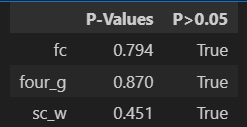

In [73]:
Image('./imagenes/21.png')

Ahora observemos la matriz de correlacion de abajo

<Axes: >

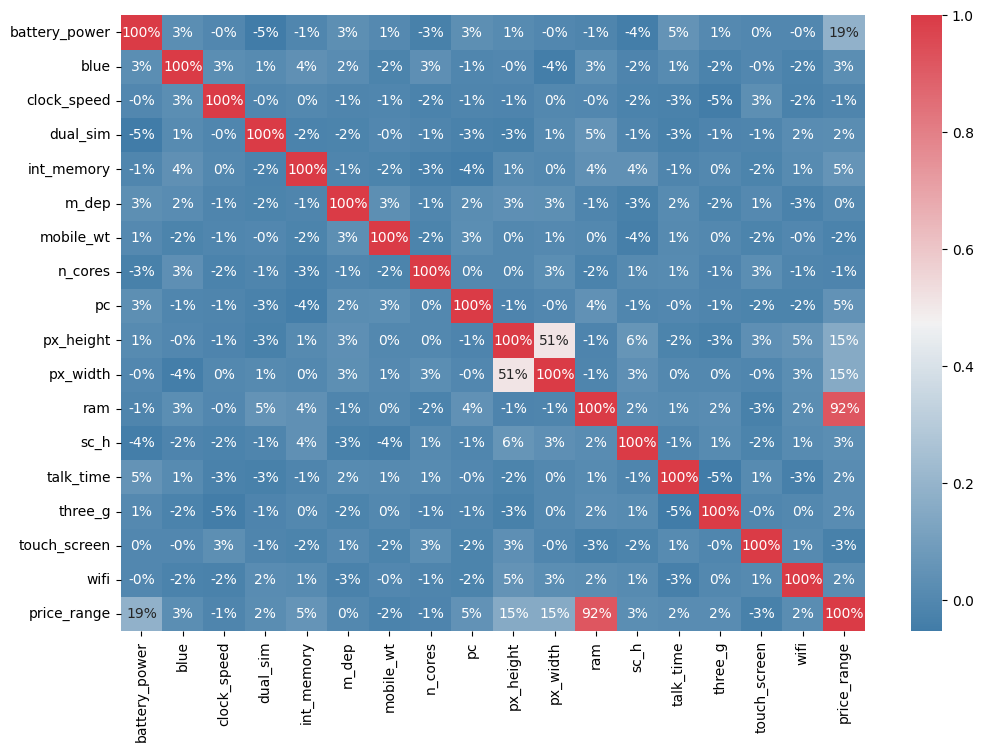

In [74]:


dfAux = algoPrediccion2.X.copy()
dfAux['price_range'] = algoPrediccion2.Y.copy()
corr = dfAux.corr()
plt.subplots(figsize=(12,8))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, fmt='.0%',
            cmap=sns.diverging_palette(240, 10, as_cmap=True)) 


como podemos ver sc_w ha sido eliminado por lo que nisiquiera tenemos la necesidad de tratarlo. Aun asi nos queda pendiente px_height y px_width que era variables confusoras (segun el analisis que habiamos hecho). Habiamos acordado en eliminar height debido a que en analisis previo realizado sobre las variables confusoras no habiamos tenido en cuenta todas las variables posibles como podemos ver abajo

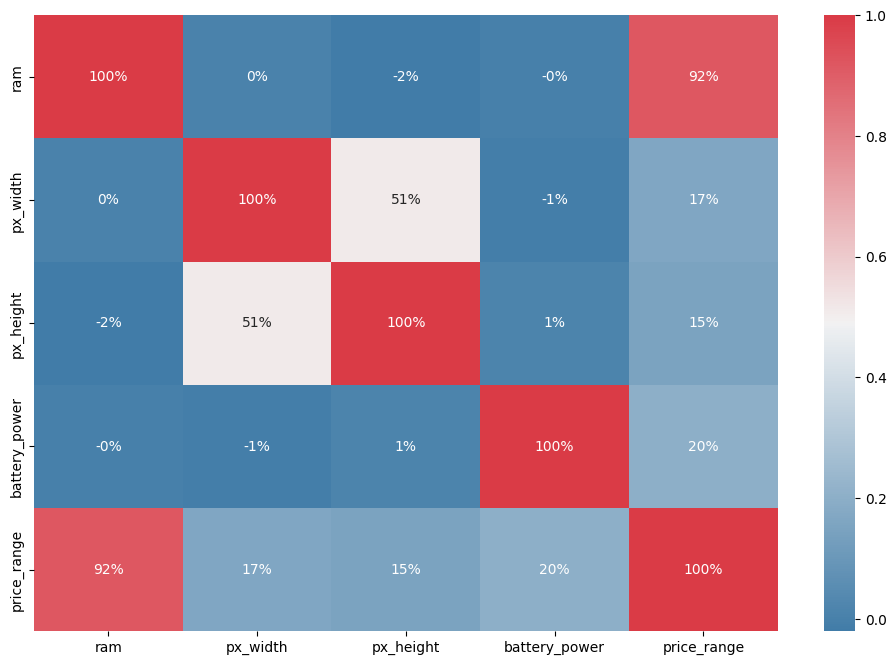

In [75]:
Image('./imagenes/confusoraSesgado.png')

Continuemos

Sin embargo, al observar la matriz de correlación actual (grafico de abajo) después de haber realizado la limpieza de datos en las pruebas anteriores mas la eliminacion hacia atras, notamos que las variables px_height y px_width tienen una correlación similar con price_range. Esto complica la elección de cuál variable deberíamos eliminar, a diferencia del análisis anterior donde trabajábamos con un conjunto reducido de variables independientes. En ese análisis, al encontrar que px_width tenía una correlación más alta con price_range, habiamos acordado en eliminar a futuro la  variable  px_height. Sin embargo, en la situación actual, la decisión se vuelve más difícil debido a que px_height y px_width tienen una correlacion identica  con price_range.

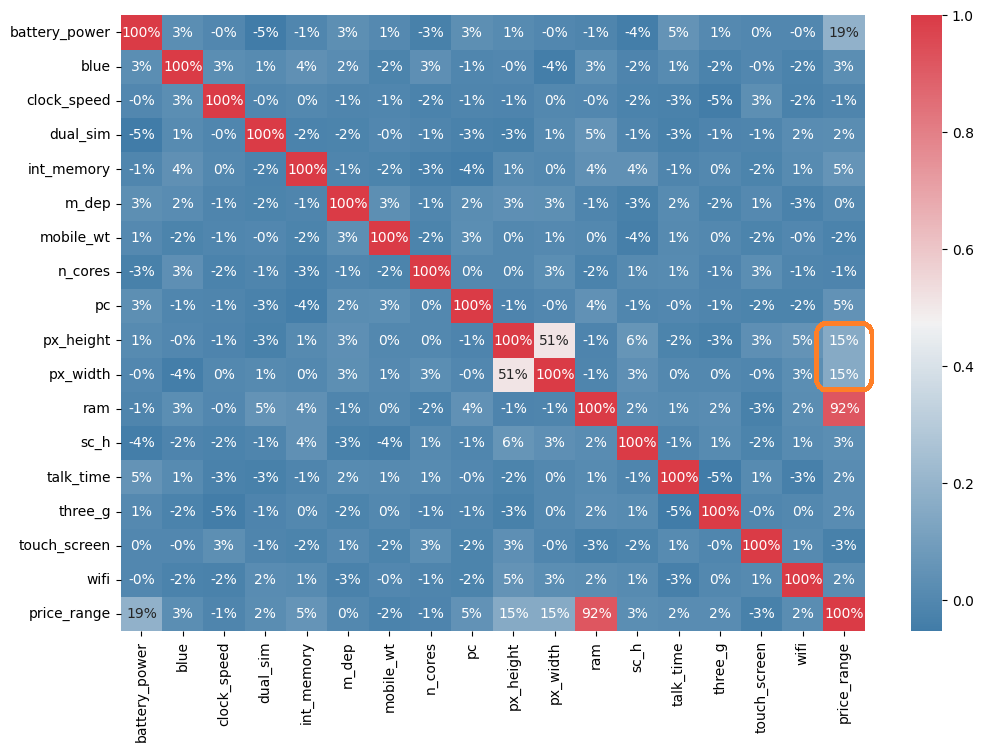

In [76]:
Image('./imagenes/matrizCorrelacion.png')

Para ver cual vamos a eliminar  hacemos   un ultimo analisis de las variables confusora , esta vez tenemos en cuenta todas variables independientes a excepcion de aquellas eliminadas con la eliminacion hacia atras.

In [77]:
y = dfcd['price_range']
# modelo a
Xa = dfcd[['battery_power', 'blue', 'clock_speed', 'dual_sim', 'int_memory',
       'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram',
       'sc_h', 'talk_time', 'three_g', 'touch_screen', 'wifi']]
varXa = Xa.columns.tolist()
rega = LinearRegression().fit(Xa, y)
# modelo con px_height pero sin px_width

Xb = dfcd[['battery_power', 'blue', 'clock_speed', 'dual_sim', 'int_memory',
       'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'ram',
       'sc_h', 'talk_time', 'three_g', 'touch_screen', 'wifi']]
varXb = Xb.columns.tolist()
regb = LinearRegression().fit(Xb, y)

# modelo con px_width pero sin px_height

Xc= dfcd[['battery_power', 'blue', 'clock_speed', 'dual_sim', 'int_memory',
       'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_width', 'ram',
       'sc_h', 'talk_time', 'three_g', 'touch_screen', 'wifi']]
varXc = Xc.columns.tolist()
regc = LinearRegression().fit(Xc, y)

model_names = ["rega", "regb", "regc"]

coefficients = [rega.coef_[0], regb.coef_[0], regc.coef_[0]]

variables = [varXa,"con px_height ",'con px_width']

pd.set_option('display.float_format', '{:.15f}'.format)

df_coef = pd.DataFrame({"Modelo": model_names,'Variables' : variables, "Coeficiente": coefficients , 'dif[rega.coef_[0]-X.coef_[0]]' : rega.coef_[0] - coefficients} )
df_coef



,Modelo,Variables,Coeficiente,dif[rega.coef_[0]-X.coef_[0]]
0,rega,"[battery_power, blue, clock_speed, dual_sim, i...",0.000503626690840,0.000000000000000
1,regb,con px_height,0.000501221593746,0.000002405097094
2,regc,con px_width,0.000507877830334,-0.000004251139494


En conclusion no vamos a tener en cuenta a  px_width ya que presenta la mayor diferencia. Procedemos a eliminar esa columna de nuestro data set.

In [78]:
dfcd = dfcd.drop('px_width' , axis=1)
dfcd

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.200000000000000,0,1,0,7,0.600000000000000,188,2,2,20,2549,9,7,19,0,0,1,1
1,1021,1,0.500000000000000,1,0,1,53,0.700000000000000,136,3,6,905,2631,17,3,7,1,1,0,2
2,563,1,0.500000000000000,1,2,1,41,0.900000000000000,145,5,6,1263,2603,11,2,9,1,1,0,2
3,615,1,2.500000000000000,0,0,0,10,0.800000000000000,131,6,9,1216,2769,16,8,11,1,0,0,2
4,1821,1,1.200000000000000,0,13,1,44,0.600000000000000,141,2,14,1208,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.500000000000000,1,0,1,2,0.800000000000000,106,6,14,1222,668,13,4,19,1,1,0,0
1996,1965,1,2.600000000000000,1,0,0,39,0.200000000000000,187,4,3,915,2032,11,10,16,1,1,1,2
1997,1911,0,0.900000000000000,1,1,1,36,0.700000000000000,108,8,3,868,3057,9,1,5,1,1,0,3
1998,1512,0,0.900000000000000,0,4,1,46,0.100000000000000,145,5,5,336,869,18,10,19,1,1,1,0


Volvemos a realizar las predicciones , esta vez sin la columna px_widht

In [79]:
algoPrediccion3 = prediccion.ClasificacionModelo(dfcd)
algoPrediccion3.realizarEntrenamientoCompleto('price_range')
algoPrediccion3.metricas()



shape X_train (1408, 15)
shape X_test (353, 15)
shape y_train (1408, 1)
shape y_test (353, 1)
              precision    recall  f1-score   support

           0     0.9362    0.9072    0.9215        97
           1     0.8252    0.8763    0.8500        97
           2     0.8049    0.8148    0.8098        81
           3     0.9189    0.8718    0.8947        78

    accuracy                         0.8697       353
   macro avg     0.8713    0.8675    0.8690       353
weighted avg     0.8718    0.8697    0.8703       353



A pesar de los esfuerzos , eliminar una variable confusora no trae buenos resultados sino todo lo contrario los empeora segun los resultados vistos aca.  Recordemos que  que representaba cada una de esas 2 variables : 
- px_height: Altura de resolución en píxeles.
- px_width: Ancho de resolución en píxeles. <br> <br>
Tienen sentido que si eliminamos algunas de ellas los resultados empeoren. No podriamos tener solamente px_height sin un px_width y ademas ambas tienen una correlacion relativamente alta con la variable dependiente price_range por lo que con eliminar una sola de ellas los resultados empeoran como pudimos ver arriba

Hasta ahora el major resultado lo obtuvimos en la prueba 4 con el dataframe llamado dfc que contenia la ultima limpieza de datos realizada + todas las anteriores dandonos asi el mejor resultado en nuestra prediccion posible

In [80]:
algoPrediccion2 = prediccion.ClasificacionModelo(dfc)
algoPrediccion2.realizarEntrenamientoCompleto('price_range')
algoPrediccion2.metricas()

shape X_train (1408, 17)
shape X_test (353, 17)
shape y_train (1408, 1)
shape y_test (353, 1)
              precision    recall  f1-score   support

           0     0.9796    0.9897    0.9846        97
           1     0.9588    0.9588    0.9588        97
           2     0.9747    0.9506    0.9625        81
           3     0.9873    1.0000    0.9936        78

    accuracy                         0.9745       353
   macro avg     0.9751    0.9748    0.9749       353
weighted avg     0.9745    0.9745    0.9744       353



Con esto finalizamos completamente con el analisis de datos. A continuacion procedemos a realizar diferentes prueba de predicciones con distintos algoritmos. Sin embargo antes vamos a generar un nuevo archivo csv con el dataframe limpiado que se ha realizado

In [81]:
dfc.to_csv('mobile_price_limpiado.csv', index=False)

A Partir de ahora se va a proceder a realizar las predicciones tanto con el dataset inicial como con el limpiado , para cada algoritmos de clasificacion considerado al igual que hicimos con el modelo de  regresion logistica.

<hr><hr>